# Airline Data Analysis summary
**The company is experiencing issues like:**


1.   -stricter environmental regulations
2.  -higher flight taxes
3.  -increased labor costs
4.   -rising fuel prices

 which impact **profitability** and **growth prospects**.







Analyzed an airline database containing multiple tables with over a million records in total using Python (Pandas, Matplotlib, Seaborn, SQLite3) in Google Colab to explore various aspects of airline operations, including aircraft capacity, ticket sales, revenue trends, fare conditions, and occupancy rates, aiming to identify areas for improving profitability and addressing challenges.

# Problem Statement
**key challenges are :**


1. **Stricter environmental regulations:** These regulations raise operating costs and restrict expansion potential.
2. **Higher flight taxes:** Increased taxes raise the overall cost of flying, reducing demand.
3. **Tight labor market resulting in increased labor costs:** Scarcity of skilled workers leads to higher labor costs and increased turnover rates.




# Objective

1.  To enhance occupancy rates.
2.  Improving pricing Stragergy.
3.  Enchance customer experience




In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Database Connection

In [9]:
conn = sqlite3.connect("/content/drive/MyDrive/airlines_db.sqlite")
cursor = conn.cursor()

**List of all the Tables**

In [7]:
tables_list =pd.read_sql_query ("""SELECT name
                    FROM sqlite_master
                    WHERE type='table';""" ,conn)
print('List of all the Tables present in the Database')

print(tables_list)

List of all the Tables present in the Database
              name
0   aircrafts_data
1    airports_data
2  boarding_passes
3         bookings
4          flights
5            seats
6   ticket_flights
7          tickets


# Relational Schema

In [ ]:
cursor.execute("SELECT sql FROM sqlite_master WHERE type='table';")
for row in cursor.fetchall():
    print(row[0])
# fetching the details about the tables for ERD

CREATE TABLE aircrafts_data (
    aircraft_code character(3) NOT NULL,
    model jsonb NOT NULL,
    range integer NOT NULL,
    CONSTRAINT aircrafts_range_check CHECK ((range > 0))
)
CREATE TABLE airports_data (
    airport_code character(3) NOT NULL,
    airport_name jsonb NOT NULL,
    city jsonb NOT NULL,
    coordinates point NOT NULL,
    timezone text NOT NULL
)
CREATE TABLE boarding_passes (
    ticket_no character(13) NOT NULL,
    flight_id integer NOT NULL,
    boarding_no integer NOT NULL,
    seat_no character varying(4) NOT NULL
)
CREATE TABLE bookings (
    book_ref character(6) NOT NULL,
    book_date timestamp with time zone NOT NULL,
    total_amount numeric(10,2) NOT NULL
)
CREATE TABLE flights (
    flight_id integer NOT NULL,
    flight_no character(6) NOT NULL,
    scheduled_departure timestamp with time zone NOT NULL,
    scheduled_arrival timestamp with time zone NOT NULL,
    departure_airport character(3) NOT NULL,
    arrival_airport character(3) NOT NULL,
  

>ER daigram for the airline database to understand the realtionship between the tables more efficiently







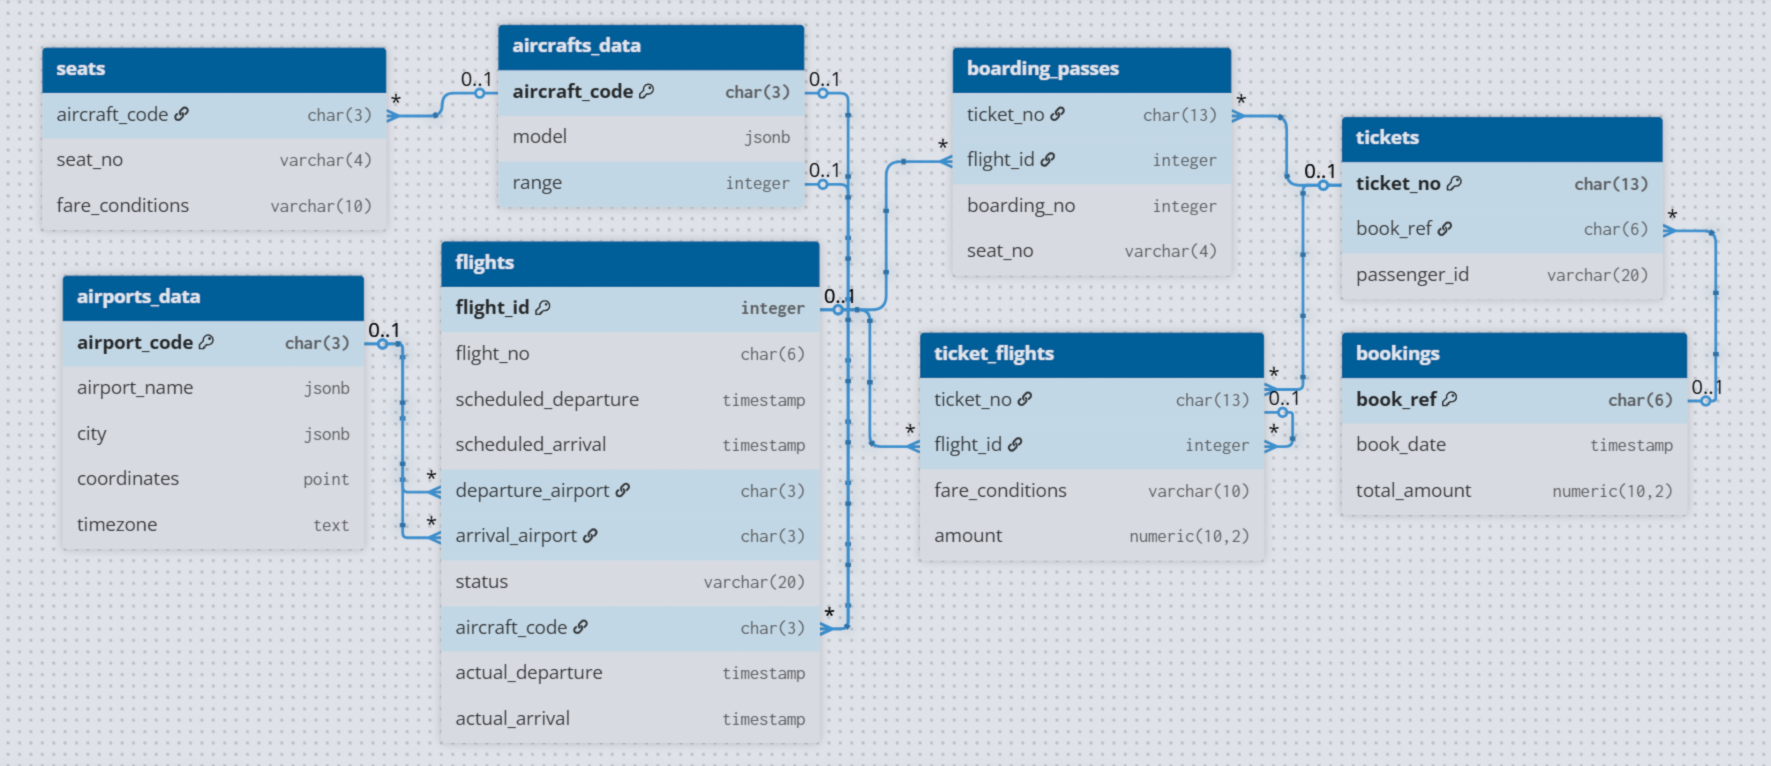

# Exploratory Data Analyisis

In [16]:
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data", conn)
aircrafts_data.shape
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [17]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data", conn)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [18]:
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes", conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [20]:
 bookings = pd.read_sql_query("SELECT * FROM bookings", conn)
 bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [19]:
flights = pd.read_sql_query("SELECT * FROM flights", conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [21]:
seats = pd.read_sql_query("SELECT * FROM seats", conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [23]:
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights", conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [22]:
tickets = pd.read_sql_query("SELECT * FROM tickets", conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


Table Information

In [24]:
for table in tables_list['name'] :
    print('\ntable: ', table)
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table:  aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table:  airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table:  boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table:  bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table:  flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table:  seats
('aircraft_code', 'character(3)')
('seat_no', 'character var

To check if any missing value present

In [25]:
for table in tables_list['name']:
    print('\ntable: ', table)
    Df_table = pd.read_sql_query(f"select* from {table}", conn)
    print(Df_table.isnull().sum())


table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

**How many plans have more than 100 seats ?**

In [28]:
df1  =  pd.read_sql_query("""SELECT aircraft_code,
                              COUNT(*) AS num_seats
                              FROM seats GROUP BY aircraft_code
                              HAVING num_seats > 100
                              ORDER BY num_seats ASC""", conn)
df1

,aircraft_code,num_seats
0,319,116
1,733,130
2,320,140
3,321,170
4,763,222
5,773,402


**How the number of tickets booked and the total amount earned changed with the time?**

In [27]:
df2 = pd.read_sql_query("""SELECT
                             SUBSTR(book_date,1,10) AS Date,
                              SUM(total_amount) as Daily_sales,
                              COUNT(ticket_no) AS tickets_sold
                              FROM tickets
                              INNER JOIN bookings
                              ON tickets.book_ref = bookings.book_ref
                              GROUP BY date
                              ORDER BY date;""", conn)
df2

,Date,Daily_sales,tickets_sold
0,2017-06-21,916100,6
1,2017-06-22,1536300,12
2,2017-06-23,3114800,28
3,2017-06-24,10279900,106
4,2017-06-25,24652200,266
5,2017-06-26,48710400,499
6,2017-06-27,88733500,1028
7,2017-06-28,147624200,1678
8,2017-06-29,248677900,2765
9,2017-06-30,337783200,3772


**NO. OF TICKETS SOLD OVER YEAR**

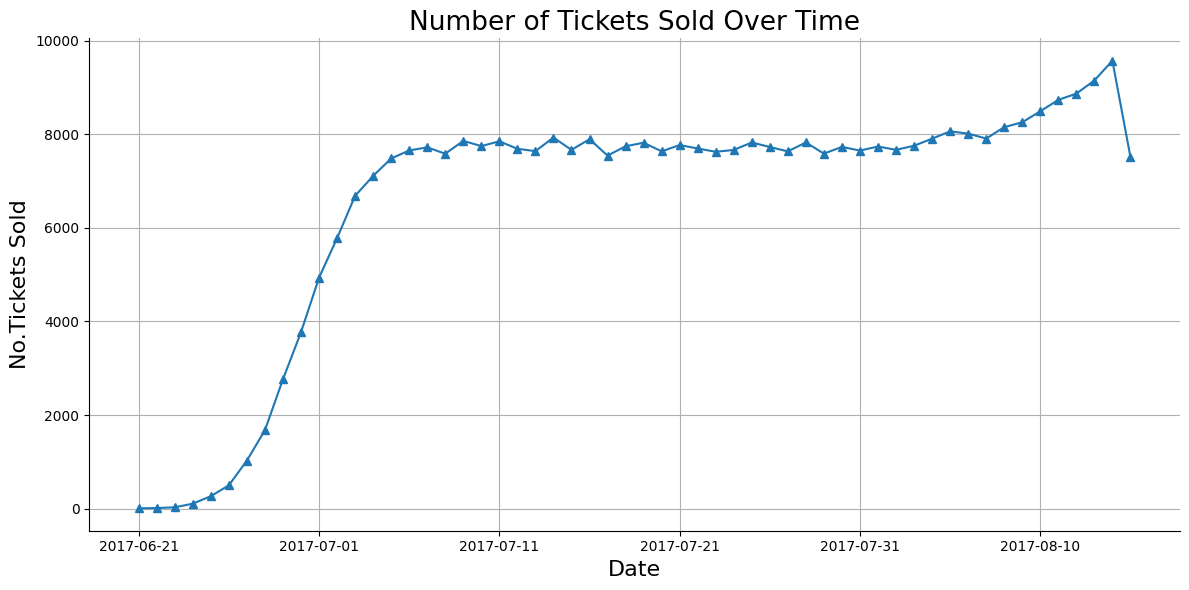

In [29]:

plt.figure(figsize=(12, 6))
plt.plot(df2['Date'], df2['tickets_sold'], marker ='^')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('No.Tickets Sold',fontsize = 16)
plt.title('Number of Tickets Sold Over Time',fontsize = 19)
plt.gca().spines[['top', 'right']].set_visible(False) # TO REMOVE THE BORDERS AND MAKE CHART MORE CLEAN
plt.grid('b')
# Set x-axis ticks at intervals
plt.xticks(df2['Date'][::10]) # Display every 5th date
plt.tight_layout()
plt.show()

**TOTAL AMOUNT EARNED OVER TIME**

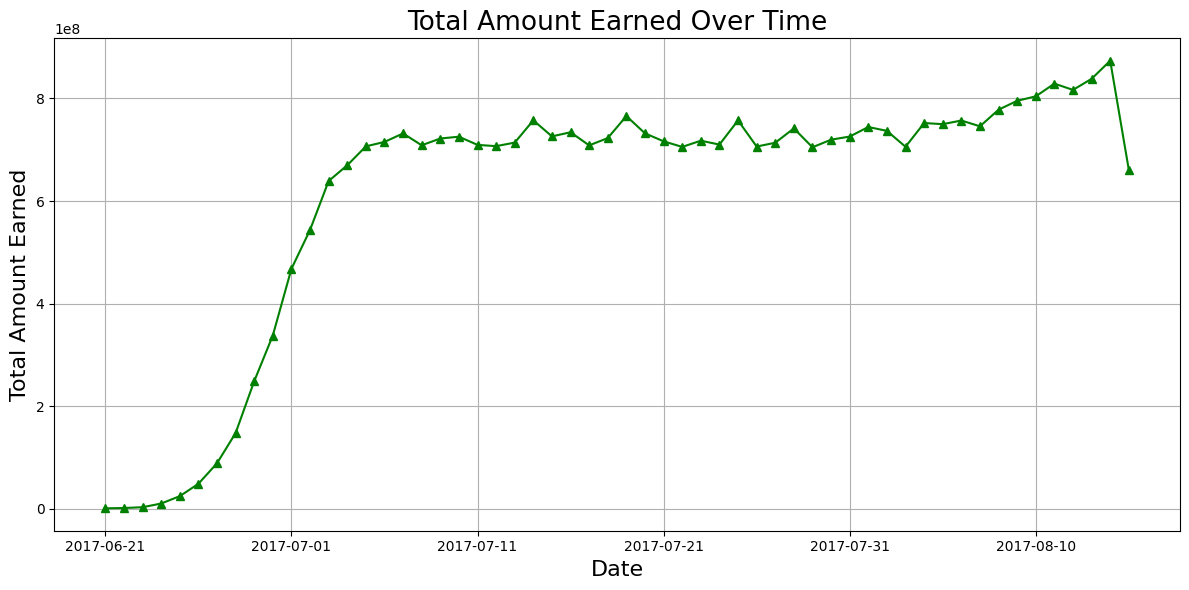

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df2['Date'], df2['Daily_sales'], marker ='^', color='green')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Total Amount Earned',fontsize = 16)
plt.title('Total Amount Earned Over Time',fontsize = 19)
plt.grid('b')
plt.xticks(df2['Date'][::10]) # Display every 10th date
plt.tight_layout()
plt.show()

**Calculate the avg. charges for each aircraft with the different fair conditions?**

In [31]:
df_avg_charges = pd.read_sql_query("""
    SELECT
       aircraft_code,fare_conditions,
        AVG(amount) as average_amount
    FROM flights
    JOIN ticket_flights ON flights.flight_id = ticket_flights.flight_id
    GROUP BY aircraft_code, fare_conditions""", conn)

display(df_avg_charges)

,aircraft_code,fare_conditions,average_amount
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


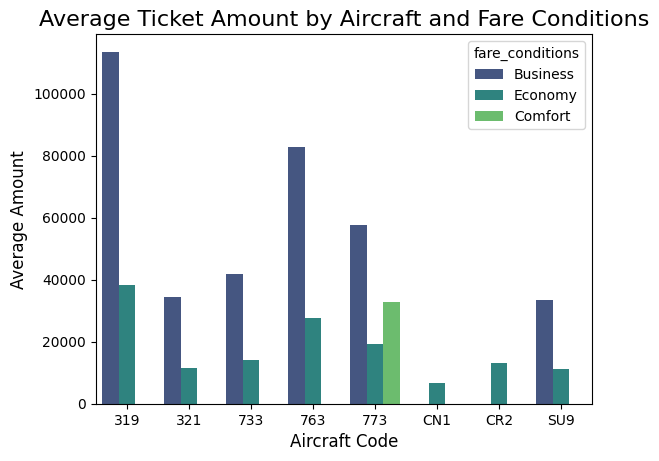

In [32]:
sns.barplot(data=df_avg_charges, x='aircraft_code', y='average_amount', hue='fare_conditions', palette='viridis')
plt.title('Average Ticket Amount by Aircraft and Fare Conditions', fontsize=16)
plt.xlabel('Aircraft Code', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)
plt.show()

#Analyzing Occupancy rate

**For each aircraft calculate the *Total Revenue* per year and the *Avg.Revenue* per ticket.**

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


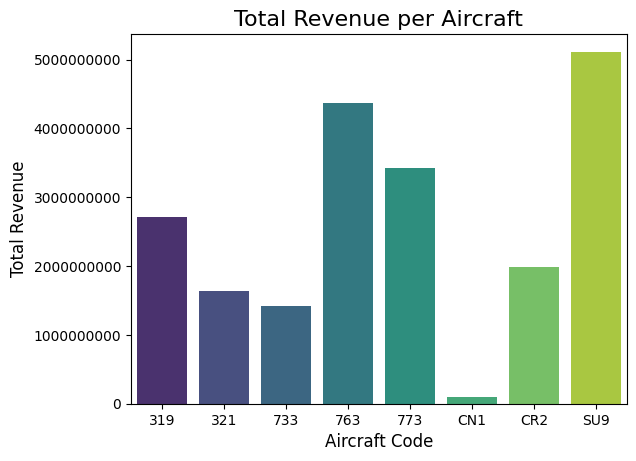

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_revenue = pd.read_sql_query("""
    SELECT
        aircraft_code,
        COUNT(*) as ticket_count,
        SUM(amount) AS total_revenue,
        CAST(AVG(amount) AS INTEGER) AS avg_revenue_per_ticket
    FROM flights AS f
    JOIN ticket_flights AS tf ON f.flight_id = tf.flight_id
    GROUP BY f.aircraft_code
""", conn)

display(df_revenue)

# Create bar chart for Total Revenue
sns.barplot(x='aircraft_code', y='total_revenue', data=df_revenue, palette='viridis')
plt.title('Total Revenue per Aircraft', fontsize=16)
plt.xlabel('Aircraft Code', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()



**Average Revenue per Ticket per Aircraft**

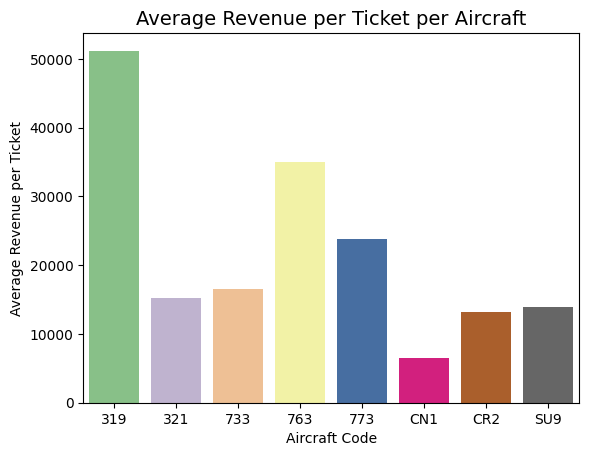

In [34]:
# Create bar chart for Average Revenue per Ticket

sns.barplot(x='aircraft_code', y='avg_revenue_per_ticket', data=df_revenue, palette='Accent')
plt.title('Average Revenue per Ticket per Aircraft', fontsize=14)
plt.xlabel('Aircraft Code', fontsize=10)
plt.ylabel('Average Revenue per Ticket', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**The *Average Occupancy Rate* for each Aircraft**

In [35]:
df_avg_occupancy = pd.read_sql_query("""

select a.aircraft_code,
       avg(a.seats_count) as booked_seats,
       a.seats_count,
       b.seat_no,
       avg(a.seats_count)/b.seat_no as occupancy_rate
 from
(
  select aircraft_code,
          flights.flight_id,
          count(*) as seats_count
   from boarding_passes
   inner join flights
       on boarding_passes.flight_id = flights.flight_id
   group by aircraft_code, flights.flight_id
) as a
inner join
(
  select aircraft_code, count(*) as seat_no
   from seats
   group by aircraft_code
) as b
on a.aircraft_code = b.aircraft_code
group by a.aircraft_code
""", conn)
df_avg_occupancy

,aircraft_code,booked_seats,seats_count,seat_no,occupancy_rate
0,319,53.583181,51,116,0.461924
1,321,88.809231,79,170,0.522407
2,733,80.255462,98,130,0.617350
3,763,113.937294,140,222,0.513231
4,773,264.925806,222,402,0.659019
5,CN1,6.004431,12,12,0.500369
6,CR2,21.482847,25,50,0.429657
7,SU9,56.812113,43,97,0.585692


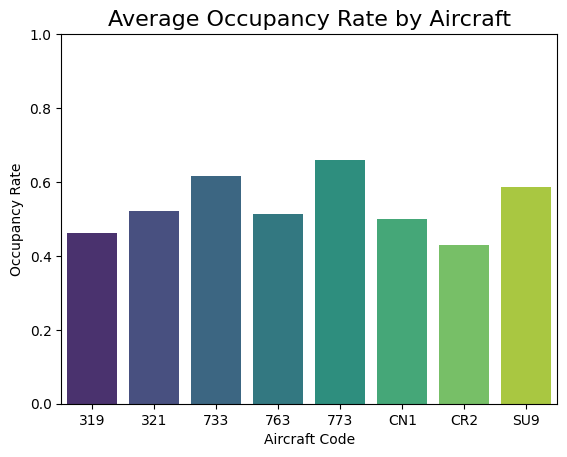

In [36]:

sns.barplot(data=df_avg_occupancy, x='aircraft_code', y='occupancy_rate', palette='viridis')
plt.title('Average Occupancy Rate by Aircraft', fontsize=16)
plt.xlabel('Aircraft Code', fontsize=10)
plt.ylabel('Occupancy Rate', fontsize=10)
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for occupancy rate
plt.show()

**Calculate by how much the Total Anual turnover could increase by giving all aircraft a 10% higher occupancy rate**

In [37]:
higher_occupancy_rate = df_avg_occupancy['occupancy_rate'] * 1.1
df_avg_occupancy['higher_occupancy_rate'] = higher_occupancy_rate

df_avg_occupancy['inc_turnover'] = (df_avg_occupancy['higher_occupancy_rate'] * df_avg_occupancy['seats_count'] * df_revenue['avg_revenue_per_ticket']).round(2)

# Remove the duplicate column
df_avg_occupancy = df_avg_occupancy.drop(columns=['higher_occup_rate'], errors='ignore')

print('Total Anual turnover could increase by each aircraft', round(df_avg_occupancy['inc_turnover'].sum(), 2), ' units')
display(df_avg_occupancy)

Total Anual turnover could increase by each aircraft 10303937.24  units


,aircraft_code,booked_seats,seats_count,seat_no,occupancy_rate,higher_occupancy_rate,inc_turnover
0,319,53.583181,51,116,0.461924,0.508116,1326819.38
1,321,88.809231,79,170,0.522407,0.574648,694168.42
2,733,80.255462,98,130,0.617350,0.679085,1102605.35
3,763,113.937294,140,222,0.513231,0.564554,2768923.61
4,773,264.925806,222,402,0.659019,0.724921,3824561.86
5,CN1,6.004431,12,12,0.500369,0.550406,43380.82
6,CR2,21.482847,25,50,0.429657,0.472623,156048.18
7,SU9,56.812113,43,97,0.585692,0.644261,387429.62


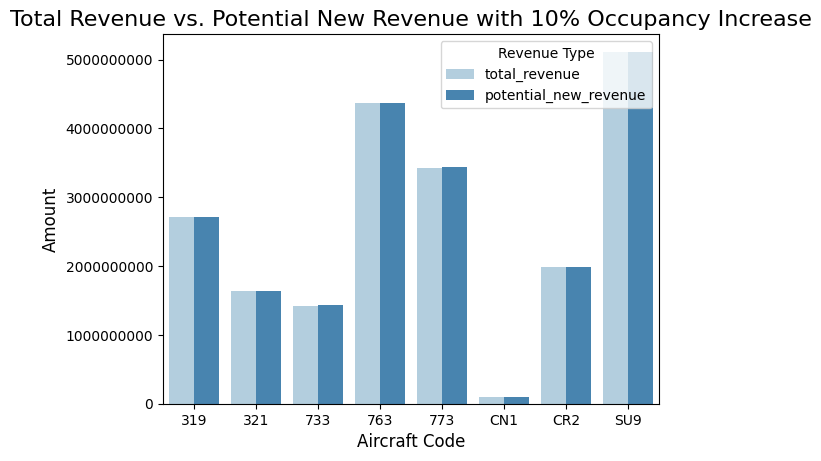

In [38]:
# Merge the dataframes to have both current total revenue and increased turnover in one dataframe
df_merged = pd.merge(df_revenue[['aircraft_code', 'total_revenue']], df_avg_occupancy[['aircraft_code', 'inc_turnover']], on='aircraft_code')

# Calculate the potential new total revenue
df_merged['potential_new_revenue'] = df_merged['total_revenue'] + df_merged['inc_turnover']

# Reshape the dataframe for plotting
df_plot = df_merged.melt(id_vars='aircraft_code', value_vars=['total_revenue', 'potential_new_revenue'], var_name='Revenue Type', value_name='Amount')

# Create the bar chart

sns.barplot(data=df_plot, x='aircraft_code', y='Amount', hue='Revenue Type', palette='Blues')
plt.title('Total Revenue vs. Potential New Revenue with 10% Occupancy Increase', fontsize=16)
plt.xlabel('Aircraft Code', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') # To avoid scientific notation on y-axis
plt.show()

# Key Insights

Based on the analysis, the following key insights were identified:

*   **Aircraft Capacity:** Six aircraft types have more than 100 seats, with the Boeing 773 having the highest capacity (402 seats) and the Airbus A319 having the lowest among these (116 seats).
*   **Ticket Sales and Revenue over Time:** Both the number of tickets sold and the total amount earned show an increasing trend from late June to mid-August 2017, with some fluctuations. There's a noticeable drop in both at the end of the observed period.
*   **Average Charges by Aircraft and Fare Conditions:** Business class tickets consistently have significantly higher average amounts compared to Economy and Comfort classes across all aircraft. The Airbus A319 (319) has the highest average business class ticket amount, while the Boeing 773 (773) has a notable average amount for Comfort class.
*   **Total Revenue per Aircraft:** The Sukhoi Superjet-100 (SU9) generates the highest total revenue, followed by the Boeing 767-300 (763) and Boeing 777-300 (773).
*   **Average Revenue per Ticket per Aircraft:** The Airbus A319 (319) has the highest average revenue per ticket, likely due to its high average business class fare.
*   **Average Occupancy Rate:** The Boeing 773 (773) has the highest average occupancy rate (around 65.9%), while the Bombardier CRJ-200 (CR2) has the lowest (around 42.9%).
*   **Potential Turnover Increase:** A 10% increase in occupancy rate across all aircraft could lead to a total annual turnover increase of approximately 10.3 million units.







#  Recommendations
To address the challenges and improve profitability and growth prospects, consider the following recommendations:

1.  **Focus on High-Revenue Aircraft:** While the SU9 has the highest total revenue, investigate the reasons behind the high average ticket price on the Airbus 319 and explore strategies to replicate this success on other aircraft, particularly in Business class.
2.  **Improve Occupancy Rates on Lower-Performing Aircraft:** Implement targeted marketing and pricing strategies to increase the occupancy rates of aircraft like the CR2 and 319, which currently have lower average occupancy.
3.  **Analyze the End-of-Period Drop:** Investigate the reason for the drop in ticket sales and revenue in mid-August 2017. This could be due to seasonality, external factors, or internal operational issues. Understanding the cause is crucial for future planning.
4.  **Optimize Fare Conditions Mix:** Analyze the demand and profitability of different fare conditions on each aircraft to optimize the mix and pricing for maximum revenue.
5.  **Leverage High-Range Aircraft:** The Boeing 777-300 (773) has the highest range. Explore opportunities to utilize its capacity and range for more profitable long-haul routes or routes with higher demand.
6.  **Address External Factors:** While the analysis focuses on internal data, the problem statement mentions external factors like stricter environmental regulations, higher flight taxes, increased labor costs, and rising fuel prices. A comprehensive strategy should include lobbying efforts, exploring fuel-efficient aircraft or technologies, and optimizing labor management.

# Conclusion

The analysis of the airline database provides valuable insights into the current state of the business, highlighting areas of strength and weakness. By focusing on improving occupancy rates on lower-performing aircraft, optimizing pricing strategies based on fare conditions and aircraft type, and investigating the reasons behind fluctuations in sales and revenue, the airline can enhance profitability and work towards sustainable growth despite the challenging external environment. Further analysis into specific routes, customer demographics, and competitor pricing could provide even more granular insights for strategic decision-making.